In [1]:
import pandas as pd

df = pd.read_csv("summer.csv")  # replace with your actual filename
df.columns = df.columns.str.strip().str.lower()  # clean column names


In [2]:
df_2012 = df[df["year"] == 2012].copy()


In [3]:
medal_scores = {"Gold": 3, "Silver": 2, "Bronze": 1}
df_2012["score"] = df_2012["medal"].map(medal_scores).fillna(0)

In [4]:
ranking = (
    df_2012.groupby(["country"], as_index=False)["score"]
    .sum()
    .sort_values("score", ascending=False)
)
ranking["rank"] = ranking["score"].rank(method="dense", ascending=False).astype(int)


In [5]:
top20 = ranking.head(20)
print(top20)


   country  score  rank
82     USA    601     1
14     CHN    284     2
67     RUS    256     3
30     GBR    252     4
32     GER    212     5
4      AUS    188     6
28     FRA    172     7
44     JPN    142     8
57     NED    140     9
42     ITA    122    10
10     BRA    121    11
47     KOR    112    12
24     ESP    111    13
13     CAN     80    14
17     CRO     69    15
54     MEX     67    16
37     HUN     58    17
43     JAM     50    18
58     NOR     48    19
59     NZL     47    20


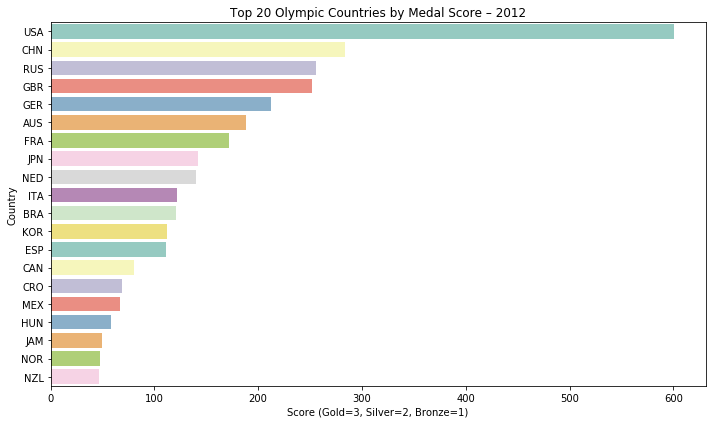

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top20, x="score", y="country", hue="country", dodge=False, palette="Set3")
ax.legend_.remove()
plt.title("Top 20 Olympic Countries by Medal Score – 2012")
plt.xlabel("Score (Gold=3, Silver=2, Bronze=1)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
